Todo:
- load full
- explore, tail, head, norm, anom
- plot against labels
- list unique url
- list anom session, cookie, etc
- list features
- reduce dimension

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
!head -n 5 "../data/output_http_csic_2010_weka_with_duplications_utf8_escd_v02_full.csv"

"index","method","url","protocol","userAgent","pragma","cacheControl","accept","acceptEncoding","acceptCharset","acceptLanguage","host","connection","contentLength","contentType","cookie","payload","label"
"0","GET","http://localhost:8080/tienda1/publico/anadir.jsp","HTTP/1.1","Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)","no-cache","no-cache","text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5","en","localhost:8080","close","null","null","JSESSIONID=B92A8B48B9008CD29F622A994E0F650D","id=2","anom"
"0","GET","http://localhost:8080/tienda1/publico/anadir.jsp","HTTP/1.1","Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)","no-cache","no-cache","text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5","en","localhost:8080

In [7]:
!sed -n "12770,12775p" < "../data/output_http_csic_2010_weka_with_duplications_utf8_escd_v02_full.csv"

"3144","GET","http://localhost:8080/tienda1/publico/registro.jsp","HTTP/1.1","Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)","no-cache","no-cache","text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5","en","localhost:8080","close","null","null","JSESSIONID=0474EC2F9E229A3DDDC7F7FCFB15B054","dni=61186493F","anom"
"3144","GET","http://localhost:8080/tienda1/publico/registro.jsp","HTTP/1.1","Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)","no-cache","no-cache","text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5","en","localhost:8080","close","null","null","JSESSIONID=0474EC2F9E229A3DDDC7F7FCFB15B054","direccion=C/ Rafael Company \"farmaceutic\", 135, ","anom"
"3144","GET","http://localhost:8080/tienda1/publico/regis

In [4]:
from pandas.io import sql
import sqlite3
conn = sqlite3.connect("../data/anomaly.db")

In [6]:
# create table
#conn.execute("drop table records")
conn.execute('''
create table records (uid integer,idx,method,url,protocol,user_agent,pragma,cache_control,accept,
accept_encoding,accept_charset,accept_language,host,connection,content_length,
content_type,cookie,payload,label)
''')

In [7]:
# delete all records
c = conn.cursor()
c.execute("delete from records")
conn.commit()

In [8]:
# insert into table
import pdb
c = conn.cursor()
INSERT_STATEMENT = """
    insert into records values ({0},"{1}","{2}","{3}","{4}","{5}","{6}","{7}",
    "{8}","{9}","{10}","{11}","{12}","{13}","{14}","{15}","{16}","{17}","{18}")"""
with open("../data/output_http_csic_2010_weka_with_duplications_utf8_escd_v02_full.csv", "r") as f:
    rdr = csv.reader(f)
    header = next(rdr)
    for n, row in enumerate(rdr):
        payload = row[16].strip().replace('\"','\'')
        stmt = INSERT_STATEMENT.format(n,
                  row[0],  row[1],  row[2],  row[3],  row[4],  row[5],  row[6],  
                  row[7],  row[8],  row[9],  row[10], row[11], row[12], row[13], 
                  row[14], row[15], payload, row[17])
        try:
            c.execute(stmt)
        except Exception as ex:
            print("error %d, %s" % (n, row[0]))
            print("exception: %s" % ex)
conn.commit()

error 126515, 3127
exception: unrecognized token: "" 6?B"")"
error 143171, 10649
exception: unrecognized token: "" 118 "")"
error 186283, 28895
exception: unrecognized token: "" 6?B"")"
error 197567, 31045
exception: unrecognized token: "" 118 "")"


In [15]:
!sed -n "126513,126517p" < "../data/output_http_csic_2010_weka_with_duplications_utf8_escd_v02_full.csv"

"3127","GET","http://localhost:8080/tienda1/miembros/editar.jsp","HTTP/1.1","Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)","no-cache","no-cache","text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5","en","localhost:8080","close","null","null","JSESSIONID=C0816A615AB510420A488FF5BB38D506","nombre=Didier","norm"
"3127","GET","http://localhost:8080/tienda1/miembros/editar.jsp","HTTP/1.1","Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)","no-cache","no-cache","text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5","en","localhost:8080","close","null","null","JSESSIONID=C0816A615AB510420A488FF5BB38D506","apellidos=Medel Pujolriu","norm"
"3127","GET","http://localhost:8080/tienda1/miembros/editar.jsp","HTTP/1.1","Mozilla/

In [ ]:
!tail -n 3 "../data/output_http_csic_2010_weka_with_duplications_utf8_escd_v02_full.csv"

In [9]:
# read into df
df = pd.read_sql("select * from records", con=conn)

In [11]:
# close connection
conn.close()

In [12]:
df.head()
df.tail()
df.describe
df.shape
df.isnull().sum()

uid                0
idx                0
method             0
url                0
protocol           0
user_agent         0
pragma             0
cache_control      0
accept             0
accept_encoding    0
accept_charset     0
accept_language    0
host               0
connection         0
content_length     0
content_type       0
cookie             0
payload            0
label              0
dtype: int64

In [23]:
df.columns

Index(['uid', 'idx', 'method', 'url', 'protocol', 'user_agent', 'pragma',
       'cache_control', 'accept', 'accept_encoding', 'accept_charset',
       'accept_language', 'host', 'connection', 'content_length',
       'content_type', 'cookie', 'payload', 'label'],
      dtype='object')

In [24]:
df.method.value_counts()

GET     123448
POST     97940
PUT       2193
dtype: int64

In [25]:
df.label.value_counts()

anom    119579
norm    103996
 135         6
dtype: int64

In [30]:
df.url.unique().size

1643

In [31]:
df.payload.unique().size

33746

In [32]:
df.user_agent.unique().size

1

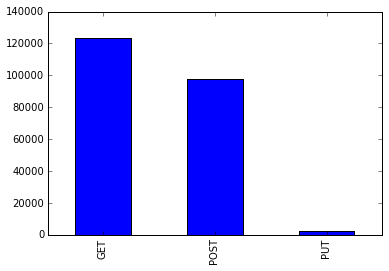

In [39]:
df.method.value_counts().plot(kind="bar")


In [15]:
df["is_anom"] = 0
df["is_anom"] = df.label.map({"norm":0, 135:0, "anom":1})

In [19]:
df.is_anom.isnull().sum()

6

In [133]:
df[df.is_anom.isnull()]

,uid,idx,method,url,protocol,user_agent,pragma,cache_control,accept,accept_encoding,accept_charset,accept_language,host,connection,content_length,content_type,cookie,payload,label,is_anom


In [20]:
df = df.dropna()

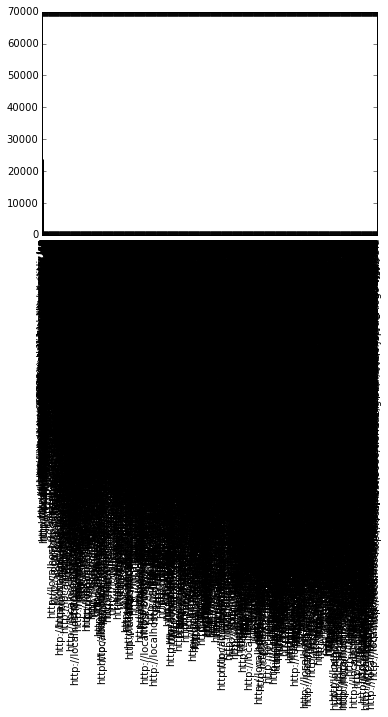

In [50]:
df.url.value_counts().plot(kind="bar")

In [58]:
ad = pd.crosstab(df.url, df.is_anom)
ad

is_anom,0.0,1.0
url,,
http://localhost:8080.BAK,0,19
http://localhost:8080.Bak,0,20
http://localhost:8080.INC,0,13
http://localhost:8080.Inc,0,25
http://localhost:8080.OLD,0,20
http://localhost:8080.Old,0,22
http://localhost:8080.bak,0,23
http://localhost:8080.inc,0,16
http://localhost:8080.java,0,16


In [134]:
pd.crosstab(df.method, df.is_anom)

is_anom,0.0,1.0
method,,
GET,61998,61447
POST,41998,55939
PUT,0,2193


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

In [21]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df["payload"], df["is_anom"])

In [22]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [149]:
print(predictions[:5])
print(X_test_raw[:5])

[ 0.  1.  1.  0.  0.]
127727             password=BOCana$da
28288     apellidos=T�rtola Planelles
198201                 login=mathieso
149653                               
126268               ciudad=Cantalejo
Name: payload, dtype: object


In [150]:
df.columns

Index(['uid', 'idx', 'method', 'url', 'protocol', 'user_agent', 'pragma',
       'cache_control', 'accept', 'accept_encoding', 'accept_charset',
       'accept_language', 'host', 'connection', 'content_length',
       'content_type', 'cookie', 'payload', 'label', 'is_anom'],
      dtype='object')

In [154]:
print(y_test.shape)
print(predictions.shape)

(55894,)
(55894,)


[[16175  9731]
 [ 2761 27227]]


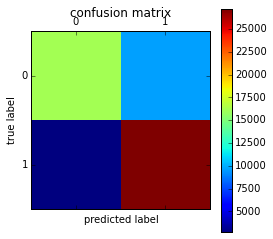

In [156]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mtrx = confusion_matrix(y_test, predictions)
print(mtrx)
plt.matshow(mtrx)
plt.title("confusion matrix")
plt.colorbar()
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
print("accuracy ", accuracy_score(y_test, predictions))

('accuracy ', 0.7779546999677962)


In [26]:
# null classifier
1 - y_test.mean()

0.46369914480981855

In [159]:
precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print("precision ", np.mean(precisions))
print("recall ", np.mean(recalls))
print("F1", np.mean(f1s))

precision  0.731994055815
recall  0.898929548784
F1 0.806911921305


In [171]:
print(y_train.shape)
print(X_train_raw.shape)

(167681,)
(167681,)


In [182]:
aa = pd.concat([X_train_raw, y_train], axis=1)

In [183]:
aa.head()

,payload,is_anom
197098,nombre=Monitor,0
152106,,0
163578,,0
100490,provincia=Ja�n,1
68839,pwd=any%3F%0D%0ASet-cookie%3A+Tamper%3D1041264...,1


In [184]:
aa[aa.is_anom == 1]

,payload,is_anom
100490,provincia=Ja�n,1
68839,pwd=any%3F%0D%0ASet-cookie%3A+Tamper%3D1041264...,1
99015,nombre=Merl�n,1
80268,cp=04531,1
37495,B1=Registrar,1
87086,login=carry,1
58046,precio=1400,1
54500,id=3,1
70472,login=perlmutt,1
107951,modo=registro,1


In [185]:
df[df.uid == 17926]

,uid,idx,method,url,protocol,user_agent,pragma,cache_control,accept,accept_encoding,accept_charset,accept_language,host,connection,content_length,content_type,cookie,payload,label,is_anom
17926,17926,4421,GET,http://localhost:8080/tienda1/publico/registro...,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,null,null,JSESSIONID=363E69E275E4D6F2BE7162D3A686412F,nombre=Laura,anom,1
